## Contents
(b) Pre-Processing and Exploratory data analysis [Go to (b)](#(b)).  
(c) Classification using KNN [Go to (c)](#(c)).    
(d)i  Minkowski Distance [Go to (d)i](#(d)i).    
(d)ii  Mahalanobis Distance [Go to (d)ii](#(d)ii).    
(e) weighted decision [Go to (e)](#(e)).  
(f) lowest training error rate of all [Go to (f)](#(f)). 

## Takeaways

1.KNN algorithm variants: k,distance function, decision method, training set size

2.Conclusion : k increases, bias incres, variance decres.

3.Different distance function.  
MinkowskiDistance: p,sum(|x - y|^p)^(1/p).  
ManhattanDistance: sum(|X-Y|).   
ChebyshevDistance: max(|X-Y|).   
MahalanobisDistance: this can eliminate the scale or correlation of data. D_M(x,y) = $\sqrt{(x-y)^T V^{-1} (x-y)}$.  

4.Measurement. confusion function

In [1]:
column_names=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
'sacral_slope', 'pelvic_radius','grade_of_spondylolisthesis','label']

In [2]:
import pandas as pd
import arff
import matplotlib.pyplot as plt

with open("../data/vertebral_column_data/column_2C_weka.arff") as f:
    dataset_2C = arff.load(f)

with open("../data/vertebral_column_data/column_3C_weka.arff") as f:
    dataset_3C = arff.load(f)

df_2C = pd.read_csv("../data/vertebral_column_data/column_2C.dat",sep=' ',header=None,names=column_names)
df_3C = pd.read_csv("../data/vertebral_column_data/column_3C.dat",sep=' ',header=None,names=column_names)

In [5]:
df_2C.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


In [6]:
df_3C.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,DH
1,39.06,10.06,25.02,29.00,114.41,4.56,DH
2,68.83,22.22,50.09,46.61,105.99,-3.53,DH
3,69.30,24.65,44.31,44.64,101.87,11.21,DH
4,49.71,9.65,28.32,40.06,108.17,7.92,DH


### (b) 
## Pre-Processing and Exploratory data analysis

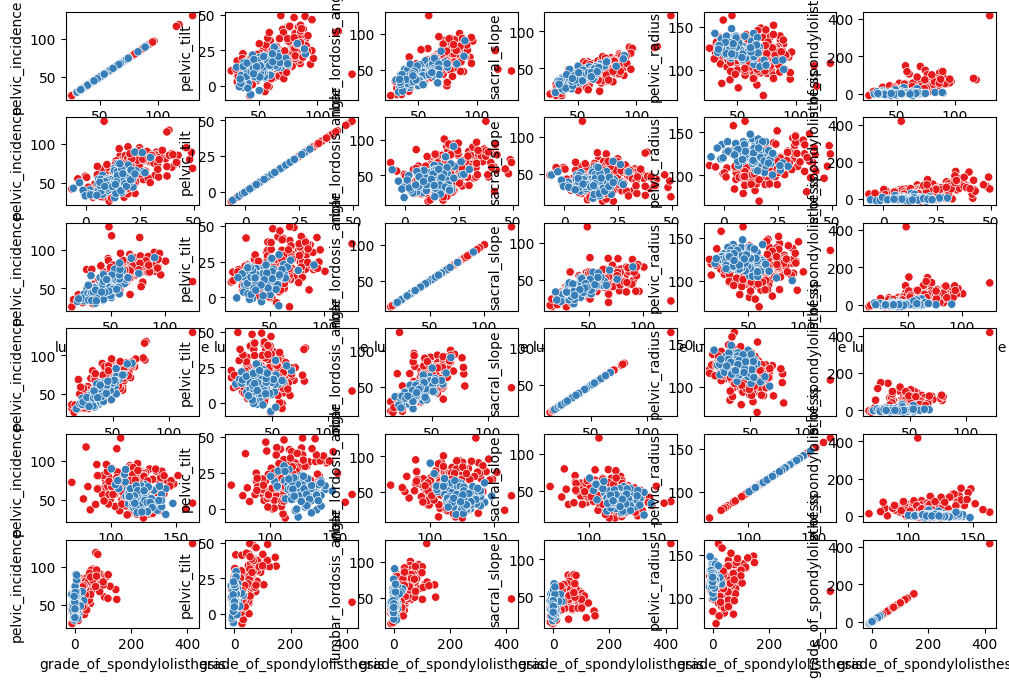

In [7]:
import seaborn as sns
#create a grid of scatter plots
fig, axes = plt.subplots(6,6,figsize=(12,8))

#AB is Red and NO is blue
for i in range(0,6):
   for j in range(0,6):
      #axes[i, j].scatter(df_2C.iloc[:,i], df_2C.iloc[:,j],c=df_2C["label"].astype("category").cat.codes)
      sns.scatterplot(data=df_2C, x=df_2C.columns[i], y=df_2C.columns[j], hue="label", palette="Set1",ax=axes[i,j],legend=False)

In [8]:
#quotient 

/var/folders/dz/mpq61s9s6lz4ymrnx6xjrx9m0000gn/T/ipykernel_22000/2164545242.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_2C,x="label",y=df_2C.columns[i],ax=axes[i],palette="Set1")
/var/folders/dz/mpq61s9s6lz4ymrnx6xjrx9m0000gn/T/ipykernel_22000/2164545242.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_2C,x="label",y=df_2C.columns[i],ax=axes[i],palette="Set1")
/var/folders/dz/mpq61s9s6lz4ymrnx6xjrx9m0000gn/T/ipykernel_22000/2164545242.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_2C,x="label",y=df_

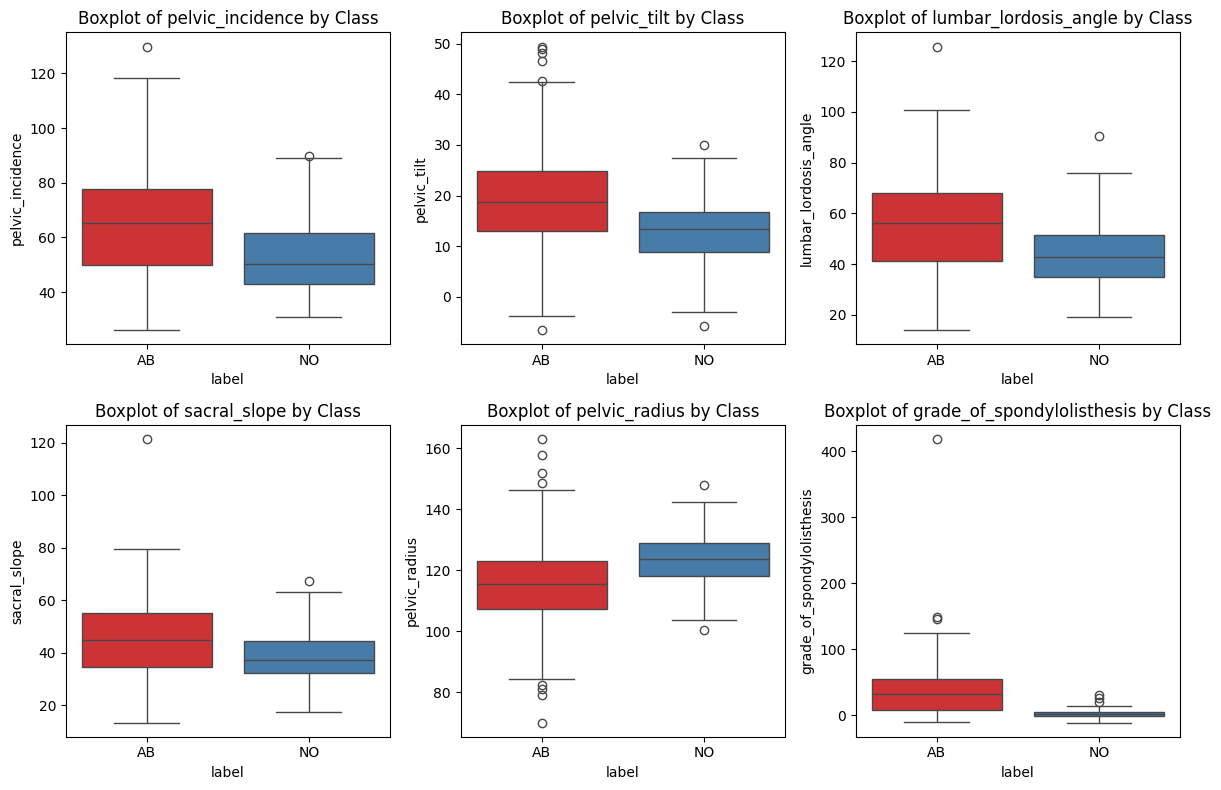

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()  
# flatten 2D axes to 1D for easier indexing

# Draw boxplots for the first 6 variables
for i in range(6):
    sns.boxplot(data=df_2C,x="label",y=df_2C.columns[i],ax=axes[i],palette="Set1")
    axes[i].set_title(f"Boxplot of {df_2C.columns[i]} by Class")

plt.tight_layout()
plt.show()

conclusion: in 2 categories, the boxplots of 6 variables are all quite different.

In [10]:
#NO=0, AB=1 Class
training_set = pd.concat([df_2C[df_2C['label']=='NO'].iloc[:70,:],\
df_2C[df_2C['label']=='AB'].iloc[:140,:]],axis=0)

test_set = pd.concat([df_2C[df_2C['label']=='NO'].iloc[71:,:],\
df_2C[df_2C['label']=='AB'].iloc[141:,:]],axis=0)

training_set['label']= training_set['label'].map({'AB': 0, 'NO': 1})
test_set['label']= test_set['label'].map({'AB': 0, 'NO': 1})
training_set

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
210,38.51,16.96,35.11,21.54,127.63,7.99,1
211,54.92,18.97,51.60,35.95,125.85,2.00,1
212,44.36,8.95,46.90,35.42,129.22,4.99,1
213,48.32,17.45,48.00,30.87,128.98,-0.91,1
214,45.70,10.66,42.58,35.04,130.18,-3.39,1
...,...,...,...,...,...,...,...
135,77.12,30.35,77.48,46.77,110.61,82.09,0
136,88.02,39.84,81.77,48.18,116.60,56.77,0
137,83.40,34.31,78.42,49.09,110.47,49.67,0
138,72.05,24.70,79.87,47.35,107.17,56.43,0


### (c)

In [11]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self,k):
        self.k = k

    def fit(self,x_train, y_train):
        self.x_train=x_train.values
        self.y_train=y_train.values
    
    def euclidean_distance(self,x1,x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def predict(self,x_test):
        predictions=[]
        x_test =x_test.values

        for row in x_test:
          distances = [ self.euclidean_distance(row,x) for x in self.x_train]
          d1 = distances.copy()
          d1.sort()
          k_indices = [distances.index(i) for i in d1[:self.k] ]
          #finding the indices that would sort an array.
          #k_indices = np.argsort(distances)[:self.k]

          k_label = self.y_train[k_indices]
          
          #find the most common label
          label = Counter(k_label).most_common(1)[0][0]
          
          predictions.append(label)
    
        return np.array(predictions)

In [12]:
# Sample dataset
# X_train = np.array([[1, 2], [2, 3], [3, 3], [6, 5], [7, 7]])
# y_train = np.array([0, 0, 0, 1, 1])

# X_test = np.array([[3, 2], [6, 6]])

# knn = KNN(k=3)
#nn.fit(X_train, y_train)
#wrong:'numpy.ndarray' object has no attribute 'values'
#predictions = knn.predict(X_test)
#print(predictions)  # Output: array of predicted labels


### plot train and test errors in terms of k

In [13]:
knn=KNN(2)
knn.fit(training_set.iloc[:,:6],training_set.iloc[:,6])
predictions_test = knn.predict(test_set.iloc[:,:6])
predictions_train= knn.predict(training_set.iloc[:,:6])

#use error rate to measure test error

train_error_rate = sum(predictions_train != training_set.iloc[:,6].values)/len(predictions_train)
test_error_rate = sum(predictions_test != test_set.iloc[:,6].values)/len(predictions_test)

train_error_rate,test_error_rate

(np.float64(0.0), np.float64(0.12244897959183673))

In [14]:
train_error_rate=[]
test_error_rate=[]

for k in range(208,0,-3):
    knn=KNN(k)
    knn.fit(training_set.iloc[:,:6],training_set.iloc[:,6])
    
    predictions_test = knn.predict(test_set.iloc[:,:6])
    predictions_train= knn.predict(training_set.iloc[:,:6])

    train_error_rate1 = sum(predictions_train != training_set.iloc[:,6].values)/len(predictions_train)
    test_error_rate1 = sum(predictions_test != test_set.iloc[:,6].values)/len(predictions_test)

    train_error_rate.append(float(train_error_rate1))
    test_error_rate.append(float(test_error_rate1))

In [15]:
#as k decreases, bias decrease, variance increase
x_axis=[]
for k in range(208,0,-3):
    x_axis.append(1/k)

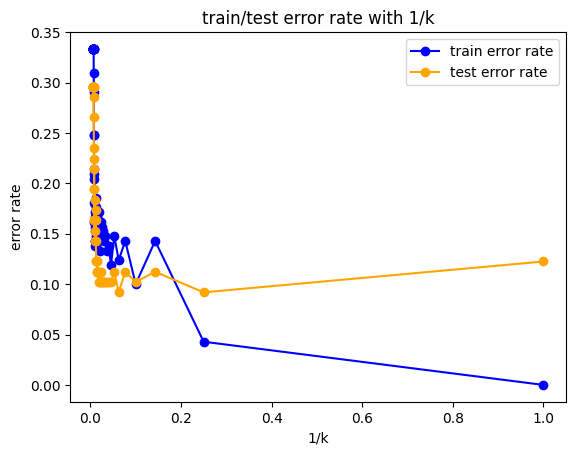

In [16]:
plt.plot(x_axis,train_error_rate,label='train error rate',color='blue',marker="o")
plt.plot(x_axis,test_error_rate,label='test error rate',color='orange',marker="o")

plt.title("train/test error rate with 1/k")
plt.xlabel("1/k")
plt.ylabel("error rate")
plt.legend()

plt.show()

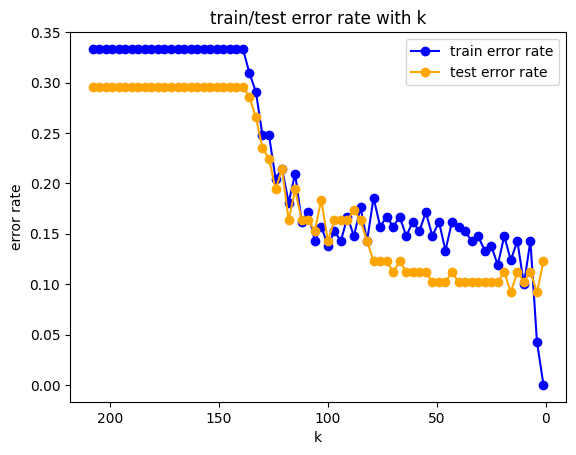

In [17]:
plt.plot(range(208,0,-3),train_error_rate,label='train error rate',color='blue',marker="o")
plt.plot(range(208,0,-3),test_error_rate,label='test error rate',color='orange',marker="o")

plt.title("train/test error rate with k")
plt.xlabel("k")
plt.ylabel("error rate")
plt.legend()

# Flip x-axis so it goes from high → low
plt.gca().invert_xaxis()
plt.show()

In [18]:
sorted_indices = np.argsort(test_error_rate)
k_star = range(208,0,-3)[sorted_indices[0]]
k_star

#the confusion matrix, true positive rate, true negative rate, precision,
#and F1-score when k=k_star**2

4

k* = 4 to make a smallest test error rate.

In [19]:
from sklearn.metrics import confusion_matrix, f1_score

knn=KNN(k_star**2)
knn.fit(training_set.iloc[:,:6],training_set.iloc[:,6])
predictions_test = knn.predict(test_set.iloc[:,:6])

cm = confusion_matrix(test_set.iloc[:,6], predictions_test)
f1 = f1_score(test_set.iloc[:,6], predictions_test)

print(cm)
#TP correctly predicts positive
#TN & FP 
#FN & TP
#sum(predictions_test[predictions_test==test_set.iloc[:,6]]==1)

[[69  0]
 [ 9 20]]


In [20]:
precision = 20/(20+0)  #TP/(TP+FP)
#Recall (a.k.a. sensitivity) = TP / (TP + FN)
#Out of all actual positives, how many did the model find?
precision,f1,69/78

(1.0, 0.8163265306122449, 0.8846153846153846)

In [21]:
recall=20/29
recall,2*(precision*recall)/(precision+recall)

(0.6896551724137931, 0.8163265306122449)

k* = 4 to make a smallest test error rate.  
when k = k*^2,the confusion matrix is TP=20,TF=69,FP=0,FN=9.   
   
True positive rate= 20/29=68.97%.  
True negative rate= 69/78=88.46%.  
Precision = TP/(TP+FP) = 100 %.  
Recall = TP / (TP + FN) = 20/29 = 68.97%.  
F1-score = 2*(Precision*Recall)/(Precision+Recall) = 81.63%


## c(3) plot best test error rate - N
learning curve

In [22]:
#KNN
#training set selection, k
#NO=0, AB=1 Class
N_records=[]
for N in range(10,211,10):
   
   training_set_new = pd.concat([training_set[training_set['label']==0].iloc[:N//3,:],\
   training_set[training_set['label']==1].iloc[:(N-N//3),:]],axis=0)

   test_error_rate=[]
   for k in range(196,0,-5):
      
      knn=KNN(k)
      knn.fit(training_set_new.iloc[:,:6],training_set_new.iloc[:,6])
    
      predictions_test = knn.predict(test_set.iloc[:,:6])
      
      test_error_rate1 = sum(predictions_test != test_set.iloc[:,6].values)/len(predictions_test)

      test_error_rate.append(float(test_error_rate1))

   min = np.min(test_error_rate)
   index = test_error_rate.index(min)

   best_index = np.argsort(test_error_rate)[0]

   #print(index,best_index)

   k_star_N = range(196,0,-5)[best_index]
   best_test_error_rate = test_error_rate[best_index]

   N_records.append((N,k_star_N,best_test_error_rate))

/var/folders/dz/mpq61s9s6lz4ymrnx6xjrx9m0000gn/T/ipykernel_22000/4226018721.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


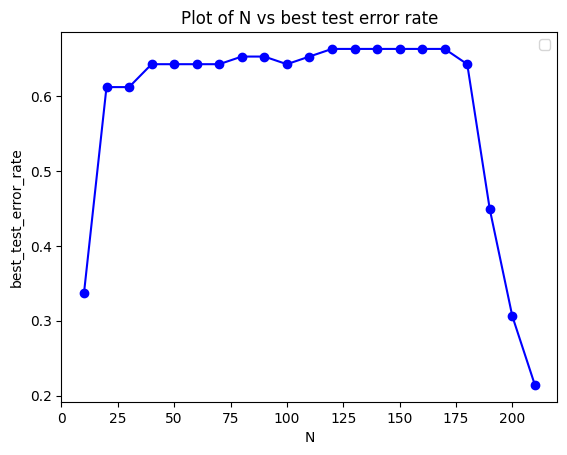

In [23]:
#plot the best test error rate -N
N=[i[0] for i in N_records]
y=[i[2] for i in N_records]

import matplotlib.pyplot as plt

plt.plot(N, y, marker="o", color="blue")
plt.xlabel("N")
plt.ylabel("best_test_error_rate")
plt.title("Plot of N vs best test error rate")
plt.legend()
plt.show()

In [24]:
#FOR each N, the best k and the best test error rate
N_records

[(10, 1, 0.336734693877551),
 (20, 6, 0.6122448979591837),
 (30, 11, 0.6122448979591837),
 (40, 6, 0.6428571428571429),
 (50, 11, 0.6428571428571429),
 (60, 16, 0.6428571428571429),
 (70, 1, 0.6428571428571429),
 (80, 1, 0.6530612244897959),
 (90, 1, 0.6530612244897959),
 (100, 11, 0.6428571428571429),
 (110, 11, 0.6530612244897959),
 (120, 11, 0.6632653061224489),
 (130, 31, 0.6632653061224489),
 (140, 31, 0.6632653061224489),
 (150, 31, 0.6632653061224489),
 (160, 26, 0.6632653061224489),
 (170, 26, 0.6632653061224489),
 (180, 51, 0.6428571428571429),
 (190, 1, 0.4489795918367347),
 (200, 1, 0.30612244897959184),
 (210, 6, 0.21428571428571427)]

## (d)  Replace the Euclidean metric with the following metrics. 

### (d)i  
Manhattan Distance,Chebyshev Distance

In [25]:
#(i) Minkowski Distance which becomes Manhattan Distance with
#p= 1
class KNN:
    def __init__(self,k):
        self.k = k

    def fit(self,x_train, y_train):
        self.x_train=x_train.values
        self.y_train=y_train.values
    
    def distance(self,x1,x2):
        return np.sum(np.abs((x1 - x2)))
    
    def predict(self,x_test):
        predictions=[]
        x_test =x_test.values

        for row in x_test:
          distances = [ self.distance(row,x) for x in self.x_train]
          d1 = distances.copy()
          d1.sort()
          k_indices = [distances.index(i) for i in d1[:self.k] ]
          #finding the indices that would sort an array.
          #k_indices = np.argsort(distances)[:self.k]

          k_label = self.y_train[k_indices]
          
          #find the most common label
          label = Counter(k_label).most_common(1)[0][0]
          
          predictions.append(label)
    
        return np.array(predictions)


In [26]:
test_error_rate=[]
for k in range(196,0,-5):
    
    knn=KNN(k)
    knn.fit(training_set.iloc[:,:6],training_set.iloc[:,6])

    predictions_test = knn.predict(test_set.iloc[:,:6])
    
    test_error_rate1 = sum(predictions_test != test_set.iloc[:,6].values)/len(predictions_test)

    test_error_rate.append(float(test_error_rate1))

min = np.min(test_error_rate)
index = test_error_rate.index(min)

best_index = np.argsort(test_error_rate)[0]

k_star_210 = range(196,0,-5)[best_index]
best_test_error_rate = test_error_rate[best_index]

k_star_210

11

For Manhattan Distance, the best k is 11

In [27]:
from sklearn.metrics import DistanceMetric
# with log(p) belongs to {0.1,0.2, ... 1}, and k_star_210=11
# what is the best log10(p)

class KNN_minokowski:
    def __init__(self,k):
        self.k = k

    def fit(self,x_train, y_train,p):
        self.x_train=x_train.values
        self.y_train=y_train.values
        self.p = p
    
    def distance(self,x1,x2):
        minkowski = DistanceMetric.get_metric("minkowski", p=self.p)
        dist = minkowski.pairwise([x1], [x2])
        return dist[0][0]
    
    def predict(self,x_test):
        predictions=[]
        x_test =x_test.values

        for row in x_test:
          distances = [ self.distance(row,x) for x in self.x_train]
          d1 = distances.copy()
          d1.sort()
          k_indices = [distances.index(i) for i in d1[:self.k] ]
          #finding the indices that would sort an array.
          #k_indices = np.argsort(distances)[:self.k]

          k_label = self.y_train[k_indices]
          
          #find the most common label
          label = Counter(k_label).most_common(1)[0][0]
          
          predictions.append(label)
    
        return np.array(predictions)

In [28]:
# with log(p) belongs to {0.1,0.2, ... 1}, and k_star_210=11
# what is the best log10(p)
test_error_rate=[]
for i in np.arange(0.1,1.1,0.1):
    
    #print(i)
    knn=KNN_minokowski(k_star_210)
    knn.fit(training_set.iloc[:,:6],training_set.iloc[:,6],p=10**i)

    predictions_test = knn.predict(test_set.iloc[:,:6])
    
    test_error_rate1 = sum(predictions_test != test_set.iloc[:,6].values)/len(predictions_test)
    
    #print(test_error_rate1)

    test_error_rate.append(float(test_error_rate1))

best_index = np.argsort(test_error_rate)[0]

log10p_best = list(np.arange(0.1,1.1,0.1))[best_index]
best_test_error_rate = test_error_rate[best_index]

log10p_best,best_test_error_rate

(np.float64(0.1), 0.10204081632653061)

### when k*=11, the best log10(p) is 0.1 to make a smallest test error rate

In [29]:
# Chebyshev Distance with p →∞

class KNN_chebyshev:
    def __init__(self,k):
        self.k = k

    def fit(self,x_train, y_train):
        self.x_train=x_train.values
        self.y_train=y_train.values
    
    def distance(self,x1,x2):        
        return np.max(np.abs(x1 - x2))
    
    def predict(self,x_test):
        predictions=[]
        x_test =x_test.values

        for row in x_test:
          distances = [ self.distance(row,x) for x in self.x_train]
          k_indices = np.argsort(distances)[:self.k]

          k_label = self.y_train[k_indices]
          
          #find the most common label
          label = Counter(k_label).most_common(1)[0][0]
          
          predictions.append(label)
    
        return np.array(predictions)

In [30]:
test_error_rate=[]
for k in range(196,0,-5):
    
    knn=KNN_chebyshev(k)
    knn.fit(training_set.iloc[:,:6],training_set.iloc[:,6])

    predictions_test = knn.predict(test_set.iloc[:,:6])
    
    test_error_rate1 = sum(predictions_test != test_set.iloc[:,6].values)/len(predictions_test)

    test_error_rate.append(float(test_error_rate1))

best_index = np.argsort(test_error_rate)[0]

k_star_210 = range(196,0,-5)[best_index]
best_test_error_rate = test_error_rate[best_index]

k_star_210,best_test_error_rate

(16, 0.09183673469387756)

For Chebyshev Distance, best k is 16

### (d)ii 

In [31]:
from sklearn.metrics import DistanceMetric
#Mahalanobis distance could eliminate the Scale/magnitude and correlation of Data
#(a normalized Euclidean distance)
#in Euclidean distance, all dimensions are treated equally.

class KNN_mahalanobis:
    def __init__(self,k):
        self.k = k

    def fit(self,x_train, y_train):
        self.x_train=x_train.values
        self.y_train=y_train.values
        self.cov_matrix = np.cov(self.x_train, rowvar=False) 
    
    def distance(self,x1,x2):

        maha = DistanceMetric.get_metric("mahalanobis", V=self.cov_matrix)
        dist_matrix = maha.pairwise(x1, x2)
        return dist_matrix
    
    def predict(self,x_test):
        predictions=[]
        x_test =x_test.values

        dist_matrix = self.distance(x_test,self.x_train)

        for row in dist_matrix:
           
          #finding the indices that would sort an array.
          k_indices = np.argsort(row)[:self.k]

          k_label = self.y_train[k_indices]
          
          #find the most common label
          label = Counter(k_label).most_common(1)[0][0]
          
          predictions.append(label)
    
        return np.array(predictions)

In [32]:
test_set

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
281,64.26,14.50,43.90,49.76,115.39,5.95,1
282,53.68,13.45,41.58,40.24,113.91,2.74,1
283,49.00,13.11,51.87,35.88,126.40,0.54,1
284,59.17,14.56,43.20,44.60,121.04,2.83,1
285,67.80,16.55,43.26,51.25,119.69,4.87,1
...,...,...,...,...,...,...,...
205,80.11,33.94,85.10,46.17,125.59,100.29,0
206,95.48,46.55,59.00,48.93,96.68,77.28,0
207,74.09,18.82,76.03,55.27,128.41,73.39,0
208,87.68,20.37,93.82,67.31,120.94,76.73,0


In [33]:
test_error_rate=[]
for k in range(196,0,-5):
    
    knn=KNN_mahalanobis(k)
    knn.fit(training_set.iloc[:,:6],training_set.iloc[:,6])

    predictions_test = knn.predict(test_set.iloc[:,:6])
    
    test_error_rate1 = sum(predictions_test != test_set.iloc[:,6].values)/len(predictions_test)

    test_error_rate.append(float(test_error_rate1))

min = np.min(test_error_rate)
index = test_error_rate.index(min)

best_index = np.argsort(test_error_rate)[0]

k_star_210 = range(196,0,-5)[best_index]
best_test_error_rate = test_error_rate[best_index]

k_star_210,best_test_error_rate

(1, 0.16326530612244897)

For Mahalanobis Distance, the best k is 1

## (e)

In [34]:
#Euclidean, Manhattan, and Chebyshev
#the majority polling can be replaced by weighted decision

#in which the weight of each point in voting is inversely proportional
#to its distance from the query/test data point.

#convert the weighted score into class 0/1 by thresholding at 0.5
def euclidean(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan(x1, x2):
    return np.sum(np.abs(x1 - x2))

def chebyshev(x1, x2):
    return np.max(np.abs(x1 - x2))

class KNN:
    def __init__(self,k,function):
        self.k = k
        self.function = function

    def fit(self,x_train, y_train):
        self.x_train=x_train.values
        self.y_train=y_train.values
    
    def distance(self,x1,x2):
        return self.function(x1,x2)
    
    def predict(self,x_test):
        predictions=[]
        x_test =x_test.values

        for row in x_test:
          distances = [self.distance(row,x) for x in self.x_train]
          k_indices = np.argsort(distances)[:self.k]

          k_distances = np.array(distances)[k_indices]
          epsilon = 1e-9
          weights = np.array([1 / (d + epsilon) for d in k_distances])

          k_label = np.array(self.y_train[k_indices])
          
          weighted_score = np.sum(k_label*weights)/np.sum(weights)

          label = 0 if  weighted_score< 0.5 else 1       
          predictions.append(label)
    
        return np.array(predictions)


In [35]:
k_indices = np.argsort([4,3,2,1,7])[:3]
k_indices
np.array([4,3,2,1,7])[k_indices]

array([1, 2, 3])

In [36]:
#
def get_best_k(function):
    test_error_rate=[]
    for k in range(196,0,-5):
        
        knn=KNN(k,function)
        knn.fit(training_set.iloc[:,:6],training_set.iloc[:,6])

        predictions_test = knn.predict(test_set.iloc[:,:6])
        
        test_error_rate1 = sum(predictions_test != test_set.iloc[:,6].values)/len(predictions_test)

        test_error_rate.append(float(test_error_rate1))

    best_index = np.argsort(test_error_rate)[0]

    k_star_210 = range(196,0,-5)[best_index]
    best_test_error_rate = test_error_rate[best_index]

    return (k_star_210,best_test_error_rate)

In [37]:
#Use weighted voting with Euclidean, Manhattan, and Chebyshev distance

get_best_k(euclidean)

(6, 0.09183673469387756)

In [38]:
get_best_k(manhattan)

(11, 0.10204081632653061)

In [39]:
get_best_k(chebyshev)

(16, 0.10204081632653061)

### (f)
The lowest training error rate is 0.  
When k=1, for training set, no matter what kind of distance functions KNN chooses, the closest point is itself so the prediction is always self, thus always true.